In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import copy
import math
import tqdm
from datetime import datetime
from sklearn.model_selection import train_test_split
import traceback

In [50]:
filename = "test_points"
df = pd.read_csv(f'{filename}.txt', header = None, sep=", ", names=["x", 'y'], engine='python')
operators1 = ['+', '-', '*', '/', 'sin', 'cos', 'const', 'x']
operators2 = ['const', 'x']

num_evaluation = 5000
depth = 4

x_s = df["x"].to_numpy()
y_s = df["y"].to_numpy()
y_s = [float(y) for y in y_s]

df.head()

,x,y
0,-25.0,625.0
1,-24.0,576.0
2,-23.0,529.0
3,-22.0,484.0
4,-21.0,441.0


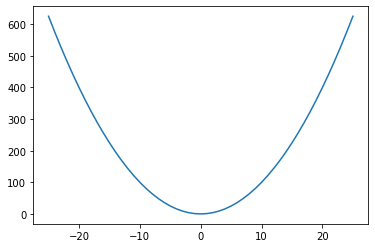

In [42]:
plt.plot(x_s, y_s);

In [36]:
def find_all_children(arr):
    """
    random pick a parent node and return it in a list with ALL its children (children, grand-children)  
    """
    
    res = []
    ptr = 0
    n = random.randint(2*len(arr)//5, len(arr)//2) # len(arr)-1
    res.append(n)
    
    while res[ptr] <= len(arr)-1:
        if 2 * res[ptr] <= len(arr)-1:
            res.append(2*res[ptr])
        else: break
        if 2 * res[ptr] + 1 <= len(arr)-1:
            res.append(2*res[ptr]+1)
        else: break
            
        ptr += 1
    return res


def merge(dict1, dict2):
    """merge two dictionaries"""
    res = {**dict1, **dict2}
    return res

In [6]:
def random_generate(depth):
    """
    generate a sequence of binary heap
    INPUTS:
        depth: depth of the binary tree -> int
    
    OUTPUT:
        binary heap
    """
    
    max_length = 2 ** depth - 1
    
    length = random.randint(1, max_length)
    first_half = length//2
    second_half = length - first_half
    
    res = ['nah']
    
    for i in range(1, first_half):
        pick = random.choice(operators1)
        
        if (pick == res[i-1]) and (res[i//2] == '-'):
            tmp = copy.deepcopy(operators1)
            tmp.remove(res[i-1])
            pick = random.choice(tmp)
            
        if pick == "const":
            pick = round(random.random() * 10 + 0.1, 4)
            
        res.append(pick)
        
    for i in range(first_half, length):
        
        pick = random.choices(population=operators2, weights=(0.5, 0.5))[0]
        
        if (pick == res[i-1]) and (res[i//2] == '-'):
            tmp = copy.deepcopy(operators2)
            tmp.remove(res[i-1])
            pick = random.choice(tmp)
            
        if pick == "const":
            pick = round(random.random() * 10 + 0.1, 4)
            
        res.append(pick)
        
    return res

In [7]:
random_generate(depth=5)

['nah',
 'sin',
 9.2717,
 '*',
 '+',
 '*',
 'cos',
 'cos',
 'x',
 'x',
 'x',
 'x',
 6.4934,
 7.236,
 9.1758,
 9.0874,
 'x',
 7.095,
 'x']

In [8]:
def mutate(binary_heap, mutate_rate):
    
    binaryheap = copy.deepcopy(binary_heap)
    
    ele = int(len(binaryheap) * mutate_rate)
    
    for i in range(ele):
        ptr = random.randint(1, len(binaryheap)-1)

        if ptr < len(binaryheap)//2:
            pick = random.choice(operators1)

            if (pick == binaryheap[ptr-1]) and (binaryheap[ptr//2] == '-'):
                tmp = copy.deepcopy(operators1)
                tmp.remove(binaryheap[ptr-1])
                pick = random.choice(tmp)       

        else:
            pick = random.choice(operators2)

            if (pick == binaryheap[ptr-1]) and (binaryheap[ptr//2] == '-'):
                tmp = copy.deepcopy(operators2)
                tmp.remove(binaryheap[ptr-1])
                pick = random.choice(tmp)

        if pick == "const":
            pick = round(random.random() * 10 + 0.1, 4)
        
        binaryheap[ptr] = pick

    return binaryheap

In [9]:
a = random_generate(depth=4)
a

['nah', 'sin', 3.5084, 7.5299]

In [10]:
mutate(a, 0.5)

['nah', 'sin', 7.0466, 'x']

In [11]:
def evaluate_binary_heap(binary_heap, x):
    
    """
    Evaluate binary from back to front
    
    """
    
    bh = copy.deepcopy(binary_heap)
    for i in range(len(bh)-1, 0, -1):
        try:
            if bh[i] == 'x':
                bh[i] = x

            elif bh[i] == '+':

                bh[i] = bh[2*i] + bh[2*i+1]

            elif bh[i] == '-':

                bh[i] = bh[2*i] - bh[2*i+1]

            elif bh[i] == '*':

                bh[i] = bh[2*i] * bh[2*i+1]

            elif bh[i] == '/':

                bh[i] = bh[2*i] / bh[2*i+1]

            elif bh[i] == 'sin':

                bh[i] = np.sin(bh[2*i])

            elif bh[i] == 'cos':

                bh[i] = np.cos(bh[2*i])
        except:
#             return random.random()
            return 10
#             pass
#             print(f"Math invalid")
#             print(binary_heap)
            
    return bh[1]

In [12]:
def calculate_y(x_s, equation):
    calculated_y = []
    for ele in x_s:
        res = evaluate_binary_heap(equation, x=ele)
        calculated_y.append(res)
    return calculated_y

In [13]:
a = random_generate(depth=4)
b = random_generate(depth=4)
print(f"a = {a}")
print(f"b = {b}")

print(f"evaluate a: {evaluate_binary_heap(a, x=2)}")
print(f"evaluate a: {evaluate_binary_heap(b, x=2)}")
crossover(a,b)

a = ['nah', '-', 'x', 1.8844, 'x', 'x', 'x']
b = ['nah', 6.2675]
evaluate a: 0.11559999999999993
evaluate a: 6.2675


NameError: name 'crossover' is not defined

In [14]:

equ = ['nah', "+", 'x', 3]
x = [1,2,3,4,5]
calculate_y(x, equ)

[4, 5, 6, 7, 8]

In [15]:
def calculate_mse(y, y_hat):
    """
    use np to calculate mse
    """
#     calculated_y = np.array(calculate_y(x_s, equation=equation))
#     calculated_y = [x.astype(float) for x in calculated_y] # cast to np.float
#     y = [n.astype(float) for n in y]
#     y_hat = [n.astype(float) for n in y_hat]
#     print(len(y) == len(y_hat))
    y = np.array(y)
    y_hat = np.array(y_hat)
    mse = np.square(np.subtract(y, y_hat)).mean()
    return mse  

In [16]:
def calc_mse(y, y_hat):
    """
    home-made mse calculation
    """
    errors_sq = []
    tmp = 0
    for i in range(len(y)):
        try:
            e = (y[i] - y_hat[i]) ** 2
            tmp = e
        except TypeError:
#             print(f"y[i] = {y[i]}")
#             print(f"y_hat[i] = {y_hat[i]}")
            pass
        errors_sq.append(tmp)
    return round(sum(errors_sq)/len(errors_sq), 8)

In [17]:
a = [45,46,34,63,75]
b = [21,64,23,64,23]
print(calc_mse(a,b))

745.2


In [18]:
def generate_population(population, depth):
    """
    generate some number of population
    """
    pool = {}
    
    for i in range(population):
        equation = random_generate(depth)
        y_calculated = calculate_y(x_s, equation=equation)
        mse = calc_mse(y_calculated, y_s)
        
        pool[mse] = equation
    
    return pool

In [19]:
def crossover(parent1, parent2):
    """
    crossover operation
    1. random pick a point at parent1
    2. random pick a point at parent2
    3. completely swap the points and their children
    4. return two trees
    """
    
    p1 = copy.deepcopy(parent1)
    p2 = copy.deepcopy(parent2)
    
    rm_idxs1 = find_all_children(p1) # top node and its grand-grandchildren - random
    rm_idxs2 = find_all_children(p2) # top node and its grand-grandchildren - random
    
#     print(rm_idxs1)
#     print(rm_idxs2)
    
    removed1 = [p1[x] for x in rm_idxs1] 
    removed2 = [p2[x] for x in rm_idxs2]
    
    for idx in rm_idxs1:
        p1[idx] = 'nah'
    
    for idx in rm_idxs2:
        p2[idx] = 'nah' 
        
        
    # if they are in the same length
    if len(removed1) == len(removed2):
        for ele in removed1:
            for i in range(1, len(p2)):
                if p2[i] == "nah":
                    p2[i] = ele
                    break
                    
        for ele in removed2:
            for i in range(1, len(p1)):
                if p1[i] == "nah":
                    p1[i] = ele
                    break
    
    # if not
    elif len(removed1) > len(removed2):

        ptr_rm = 0
        ptr_idx = 0
        while ptr_rm < len(removed1):
            while ptr_idx < len(rm_idxs2): 
                p2[rm_idxs2[ptr_idx]] = removed1[ptr_rm]
                ptr_idx += 1
                ptr_rm += 1
                
            p2.append(removed1[ptr_rm])
            ptr_rm += 1
            
        for ele in removed2:
            for idx in rm_idxs1:
                p1[idx] = ele
                break                   
    else:
        ptr_rm = 0
        ptr_idx = 0
        while ptr_rm < len(removed2):
            while ptr_idx < len(rm_idxs1): 
                p1[rm_idxs1[ptr_idx]] = removed2[ptr_rm]
                ptr_idx += 1
                ptr_rm += 1

            p1.append(removed2[ptr_rm])
            ptr_rm += 1
            
        for ele in removed1:
            for idx in rm_idxs2:
                p2[idx] = ele
                break        

         
    for i in range(1, len(p1)):
        if p1[i] == 'nah':
#             p1[i] = 'x'
            p1[i] = round(random.random() * 10 + 0.1, 4) # not the best
    for i in range(1, len(p2)):
        if p2[i] == 'nah':
#             p2[i] = 'x'
            p2[i] = round(random.random() * 10 + 0.1, 4) # not the best
                
    child1 = p1
    child2 = p2
        
    return [child1, child2]


In [20]:
def mutate_pool(pool: dict, mutate_rate: float)-> dict:
    """
    mutate a pool of population by given mutation rate
    """
    copied_pool = copy.deepcopy(pool)
    
    new_pool = {}
    
    number = int(len(copied_pool) * mutate_rate)
    
    for i in range(number):
        keys = list(copied_pool.keys())
        random.shuffle(keys)
        mutant = mutate(copied_pool[keys[0]], mutate_rate=1)
        y_hat = calculate_y(x_s, equation=mutant)
        mse = calc_mse(y_s, y_hat)
        new_pool[mse] = mutant
    pool = merge(new_pool, copied_pool)
    return pool

In [21]:
a = generate_population(population=2, depth=3)
a

{84673.33333333: ['nah', 'x'], 84434.56971456: ['nah', 'cos', 'x', 'x']}

In [22]:
mutate_pool(pool=a, mutate_rate=1)

{84673.33333333: ['nah', 'x'], 84434.56971456: ['nah', 'cos', 'x', 'x']}

In [23]:
a = ['nah',1,2,3,4,5,6,7,8,9]
b = ['nah','a', 'b', 'c', 'd', 'e', 'f', 'g']

crossover(a,b)

[['nah', 1, 2, 3, 'd', 5, 6, 7, 4.6806, 9.773],
 ['nah', 'a', 'b', 'c', 4, 'e', 'f', 'g', 8, 9]]

In [24]:
def random_search(num, x_s, y_s, depth):
    
    """
    random search
    """
    evaluation = []
    error = []
    final_equation = []
    y_calculated = []
    
    for i in range(num):
        
        if i % 100 == 0:
            print(f"{i/num_evaluation * 100} % complete")

        calculated_y = []
        
        equation = random_generate(depth=depth)
        
        for ele in x_s:
            res = evaluate_binary_heap(equation, x=ele)
            calculated_y.append(res)
            
        calculated_y = np.array(calculated_y)
        try:
            mse = (np.square(y_s - calculated_y)).mean(axis=0)
        except:
            print("raise MSE error")
        
        if len(error) == 0:
            error.append(mse)
            evaluation.append(i)
            final_equation = equation
            y_calculated = calculated_y
            
        elif mse < error[-1]:
            error.append(mse)
            evaluation.append(i)
            final_equation = equation
            y_calculated = calculated_y
            
    return [evaluation, error, final_equation, y_calculated]

In [25]:
def random_mutation_hill_climber(num, x_s, y_s, depth):
    """
    random hill climber
    """
    
    evaluation = []
    error = []
    final_equation = []
    y_calculated = []
    
    
    first_gen = random_generate(depth=depth)
    y_cal = calculate_y(x_s=x_s, equation=first_gen)
    mse = calculate_mse(y_s, y_cal)
    
    for i in range(0, num):
        
        mutant = mutate(first_gen, mutate_rate=0.01)
        calculated_y = calculate_y(x_s, equation=mutant)
        mse = calculate_mse(calculated_y, y_s)
        
        if len(error) == 0:
            error.append(mse)
            evaluation.append(i)
            final_equation = mutant
            y_calculated = calculated_y

        elif mse < error[-1]:
            error.append(mse)
            evaluation.append(i)
            final_equation = mutant
            y_calculated = calculated_y
            
        if i % 100 == 0:
            print(f"{i/num_evaluation * 100} % complete")
    
    return [evaluation, error, final_equation, y_calculated]

In [26]:
def random_restart_hill_climber(num_eval, x_s, y_s, depth, num_tries):
    evaluations = []
    errors = []
    final_equation = []
    y_calculated = []
    counter = num_eval
    
    while counter > 0:
        
        first_gen = random_generate(depth=depth)
        y_cal = calculate_y(x_s=x_s, equation=first_gen)
        mse = calculate_mse(y_s, y_cal)
        
        if (num_eval - counter) % 100 == 0:
            print(f"{(num_eval - counter)/num_evaluation*100} % complete")
        
        counter -= 1
    
        if len(errors) == 0:
            errors.append(mse)
            evaluations.append(num_eval - counter)
            final_equation = first_gen
            y_calculated = calculate_y(x_s, equation=first_gen)
        
        while num_tries > 0 and counter > 0:
            
            mutant = mutate(first_gen, mutate_rate=0.01)
            calculated_y = calculate_y(x_s, equation=mutant)
            new_mse = calculate_mse(calculated_y, y_s)
            
            if (num_eval - counter) % 100 == 0:
                print(num_eval - counter)
            
            if new_mse < errors[-1]:
                errors.append(new_mse)
                evaluations.append(num_eval - counter)
                final_equation = mutant
                y_calculated = calculate_y(x_s, mutant)
            else:
                num_tries -= 1
        
        if mse < errors[-1]:
            errors.append(mse)
            evaluations.append(num_eval - counter)
            final_equation = first_gen
            y_calculated = calculate_y(x_s, equation=first_gen)
            
    return [evaluations, errors, final_equation, y_calculated]

In [27]:
def evol_algo(num_eval, x_s, y_s, depth, init_pop):
    """
    selection 50%
    mutation are built-in to crossover
    """
    
    evaluations = []
    errors = []
    final_equation = []
    y_calculated = []
    
    counter = num_eval

    pool = generate_population(depth=depth, population=init_pop)
    print(f"pool = {len(pool)}")
    num_keys = len(pool)
    try:
        while counter > 0 and num_keys > 0:
            children_pool = {}

            keys = sorted(pool.keys(), reverse=False) 
#             keys = list(pool.keys())
            for i in range(0, len(keys)-1, 2):
                kid1, kid2 = crossover(pool[keys[i]], pool[keys[i+1]])

                y_hat_kid1 = calculate_y(x_s=x_s, equation=kid1)
                y_hat_kid2 = calculate_y(x_s=x_s, equation=kid2)
    #             children_pool[calculate_mse(y_s, y_hat_kid1)] = kid1
    #             children_pool[calculate_mse(y_s, y_hat_kid2)] = kid2

                children_pool[calc_mse(y=y_s, y_hat=y_hat_kid1)] = kid1
                children_pool[calc_mse(y=y_s, y_hat=y_hat_kid2)] = kid2

            print(f"children pool = {len(children_pool)}")

            merge_pool = merge(children_pool, pool)
            print(f"merged pool = {len(merge_pool)}")

            pool = merge_pool

            temp_pool = {}

            keys = sorted(pool.keys(), reverse=False)
            half_keys = keys[0:9*(len(keys)//10)] # selection X%
            num_keys = len(half_keys)
            print(f"# of keys = {num_keys}")

            for i in range(num_keys): 
                temp_pool[keys[i]] = pool[keys[i]]
            print(f"top pool = {len(temp_pool)}")

            lowest_error = min(half_keys)
            print(f"lowest error = {lowest_error}")
            if (len(errors) == 0) or (lowest_error < errors[-1]):
                evaluations.append(num_eval - counter)
                final_equation = temp_pool[lowest_error]
                y_calculated = calculate_y(x_s, final_equation)
                errors.append(lowest_error)

            pool = temp_pool
            counter -= 1

    #         if counter % 10 == 0:
            print(f"counter = {num_eval - counter}")
    except ValueError:
        pass
    return [evaluations, errors, final_equation, y_calculated]

In [28]:
def evol_algo_div(num_eval, x_s, y_s, depth, init_pop):
    """
    selection 50%
    mutation are built-in to crossover
    adding some random diversity
    """
    
    evaluations = []
    errors = []
    final_equation = []
    y_calculated = []
    
    counter = num_eval

    pool = generate_population(depth=depth, population=init_pop)
    print(f"pool = {len(pool)}")
    num_keys = len(pool)
    try:
        while counter > 0 and num_keys > 0:
            children_pool = {}

            keys = sorted(pool.keys(), reverse=False) 
#             keys = list(pool.keys())
            for i in range(0, len(keys)-1, 2):
                kid1, kid2 = crossover(pool[keys[i]], pool[keys[i+1]])

                y_hat_kid1 = calculate_y(x_s=x_s, equation=kid1)
                y_hat_kid2 = calculate_y(x_s=x_s, equation=kid2)

                children_pool[calc_mse(y=y_s, y_hat=y_hat_kid1)] = kid1
                children_pool[calc_mse(y=y_s, y_hat=y_hat_kid2)] = kid2

            print(f"children pool = {len(children_pool)}")
            
            merge_pool = merge(children_pool, pool)
            print(f"merged pool = {len(merge_pool)}")
            
            pool = merge_pool

            temp_pool = {}

            keys = sorted(pool.keys(), reverse=False)
            half_keys = keys[0:5*(len(keys)//10)] # selection X%
            num_keys = len(half_keys)
            if num_keys < init_pop:
                new_pool = generate_population(depth=depth, population=(init_pop - num_keys)//2)
                temp_pool = merge(temp_pool, new_pool)
            print(f"# of keys = {num_keys}")

            for i in range(num_keys): 
                temp_pool[keys[i]] = pool[keys[i]]
            print(f"top pool = {len(temp_pool)}")

            lowest_error = min(half_keys)
            print(f"lowest error = {lowest_error}")
            if (len(errors) == 0) or (lowest_error < errors[-1]):
                evaluations.append(num_eval - counter)
                final_equation = temp_pool[lowest_error]
                y_calculated = calculate_y(x_s, final_equation)
                errors.append(lowest_error)

            pool = temp_pool
            counter -= 1

    #         if counter % 10 == 0:
            print(f"counter = {num_eval - counter}")
    except ValueError:
        pass
    return [evaluations, errors, final_equation, y_calculated]

In [32]:
def evol_algo_div_mut(num_eval, x_s, y_s, depth, init_pop, mutate_rate):
    """
    selection 50%
    mutation are built-in to crossover
    adding some random diversity
    adding mutation in the pool
    """
    
    evaluations = []
    errors = []
    final_equation = []
    y_calculated = []
    
    counter = num_eval

    pool = generate_population(depth=depth, population=init_pop)
    print(f"pool = {len(pool)}")
    num_keys = len(pool)
    try:
        while counter > 0 and num_keys > 0:
            children_pool = {}

            keys = sorted(pool.keys(), reverse=False) 
#             keys = list(pool.keys())
            for i in range(0, len(keys)-1, 2):
                kid1, kid2 = crossover(pool[keys[i]], pool[keys[i+1]])

                y_hat_kid1 = calculate_y(x_s=x_s, equation=kid1)
                y_hat_kid2 = calculate_y(x_s=x_s, equation=kid2)

                children_pool[calc_mse(y=y_s, y_hat=y_hat_kid1)] = kid1
                children_pool[calc_mse(y=y_s, y_hat=y_hat_kid2)] = kid2

            print(f"children pool = {len(children_pool)}")
            
            merge_pool = merge(children_pool, pool)
            
            mutated_pool = mutate_pool(pool=merge_pool, mutate_rate=mutate_rate)
#             print(f"merged pool = {len(merge_pool)}")
            
            pool = mutated_pool

            temp_pool = {}

            keys = sorted(pool.keys(), reverse=False)
            half_keys = keys[0:5*(len(keys)//10)] # selection X%
            num_keys = len(half_keys)
            if num_keys < init_pop:
                new_pool = generate_population(depth=depth, population=(init_pop - num_keys)//2)
                temp_pool = merge(temp_pool, new_pool)
#             print(f"# of keys = {num_keys}")

            for i in range(num_keys): 
                temp_pool[keys[i]] = pool[keys[i]]
#             print(f"top pool = {len(temp_pool)}")

            lowest_error = keys[0]
            print(f"lowest error = {lowest_error}")
            if (len(errors) == 0) or (lowest_error < errors[-1]):
                evaluations.append(num_eval - counter)
                final_equation = temp_pool[lowest_error]
                y_calculated = calculate_y(x_s, final_equation)
                errors.append(lowest_error)

            pool = temp_pool
            counter -= 1

    #         if counter % 10 == 0:
            print(f"counter = {num_eval - counter}")
    except ValueError:
        pass
    return [evaluations, errors, final_equation, y_calculated]

In [55]:
res_ea_div_mut = evol_algo_div_mut(num_eval=num_evaluation, x_s=x_s, y_s=y_s, depth=depth, init_pop=20, mutate_rate=0.5)

<ipython-input-11-f83ed01f3e61>:28: RuntimeWarning: divide by zero encountered in double_scalars
  bh[i] = bh[2*i] / bh[2*i+1]
<ipython-input-11-f83ed01f3e61>:28: RuntimeWarning: invalid value encountered in double_scalars
  bh[i] = bh[2*i] / bh[2*i+1]
<ipython-input-11-f83ed01f3e61>:32: RuntimeWarning: invalid value encountered in sin
  bh[i] = np.sin(bh[2*i])


pool = 17
children pool = 16
lowest error = 26453.67388057
counter = 1
children pool = 16
lowest error = 26453.67388057
counter = 2
children pool = 16
lowest error = 26453.67388057
counter = 3
children pool = 16
lowest error = 18882.83805417
counter = 4
children pool = 16
lowest error = 18882.83805417
counter = 5
children pool = 15
lowest error = 0.0
counter = 6
children pool = 19
lowest error = 0.0
counter = 7
children pool = 19
lowest error = 0.0
counter = 8
children pool = 17
lowest error = 0.0
counter = 9
children pool = 18
lowest error = 0.0
counter = 10
children pool = 19
lowest error = 0.0
counter = 11
children pool = 18
lowest error = 0.0
counter = 12
children pool = 19
lowest error = 0.0
counter = 13
children pool = 18
lowest error = 0.0
counter = 14
children pool = 18
lowest error = 0.0
counter = 15
children pool = 18
lowest error = 0.0
counter = 16
children pool = 18
lowest error = 0.0
counter = 17
children pool = 19
lowest error = 0.0
counter = 18
children pool = 24
lowest 

<ipython-input-11-f83ed01f3e61>:24: RuntimeWarning: invalid value encountered in double_scalars
  bh[i] = bh[2*i] * bh[2*i+1]



counter = 24
children pool = 29
lowest error = 0.0
counter = 25
children pool = 30
lowest error = 0.0
counter = 26
children pool = 24
lowest error = 0.0
counter = 27
children pool = 30
lowest error = 0.0
counter = 28
children pool = 30
lowest error = 0.0
counter = 29
children pool = 30
lowest error = 0.0
counter = 30
children pool = 29
lowest error = 0.0

<ipython-input-11-f83ed01f3e61>:36: RuntimeWarning: invalid value encountered in cos
  bh[i] = np.cos(bh[2*i])



counter = 31
children pool = 30
lowest error = 0.0
counter = 32
children pool = 30
lowest error = 0.0
counter = 33
children pool = 30
lowest error = 0.0
counter = 34
children pool = 33
lowest error = 0.0
counter = 35
children pool = 29
lowest error = nan
counter = 36
children pool = 23
lowest error = 0.0
counter = 37
children pool = 20
lowest error = 0.0
counter = 38
children pool = 19
lowest error = 0.0
counter = 39
children pool = 15
lowest error = nan
counter = 40
children pool = 15
lowest error = 0.0
counter = 41
children pool = 16
lowest error = 0.0
counter = 42
children pool = 16
lowest error = 0.0
counter = 43
children pool = 15
lowest error = 0.0
counter = 44
children pool = 16
lowest error = 0.0
counter = 45
children pool = 14
lowest error = nan
counter = 46
children pool = 16
lowest error = 0.0
counter = 47
children pool = 15
lowest error = 0.0
counter = 48
children pool = 12
lowest error = 0.0
counter = 49
children pool = 12
lowest error = 0.0
counter = 50
children pool = 1

lowest error = 0.0
counter = 193
children pool = 14
lowest error = 0.0
counter = 194
children pool = 16
lowest error = 0.0
counter = 195
children pool = 15
lowest error = 0.0
counter = 196
children pool = 16
lowest error = 0.0
counter = 197
children pool = 16
lowest error = 0.0
counter = 198
children pool = 15
lowest error = 0.0
counter = 199
children pool = 15
lowest error = 0.0
counter = 200
children pool = 14
lowest error = 0.0
counter = 201
children pool = 15
lowest error = 0.0
counter = 202
children pool = 15
lowest error = 0.0
counter = 203
children pool = 16
lowest error = 0.0
counter = 204
children pool = 16
lowest error = 0.0
counter = 205
children pool = 16
lowest error = 0.0
counter = 206
children pool = 16
lowest error = 0.0
counter = 207
children pool = 16
lowest error = 0.0
counter = 208
children pool = 15
lowest error = 0.0
counter = 209
children pool = 15
lowest error = 0.0
counter = 210
children pool = 15
lowest error = 0.0
counter = 211
children pool = 15
lowest error

lowest error = 0.0
counter = 354
children pool = 15
lowest error = 0.0
counter = 355
children pool = 16
lowest error = 0.0
counter = 356
children pool = 15
lowest error = 0.0
counter = 357
children pool = 13
lowest error = 0.0
counter = 358
children pool = 14
lowest error = 0.0
counter = 359
children pool = 15
lowest error = 0.0
counter = 360
children pool = 14
lowest error = 0.0
counter = 361
children pool = 15
lowest error = 0.0
counter = 362
children pool = 16
lowest error = 0.0
counter = 363
children pool = 14
lowest error = 0.0
counter = 364
children pool = 16
lowest error = nan
counter = 365
children pool = 20
lowest error = 0.0
counter = 366
children pool = 17
lowest error = 0.0
counter = 367
children pool = 16
lowest error = 0.0
counter = 368
children pool = 13
lowest error = 0.0
counter = 369
children pool = 15
lowest error = 0.0
counter = 370
children pool = 15
lowest error = 0.0
counter = 371
children pool = 15
lowest error = 0.0
counter = 372
children pool = 13
lowest error

children pool = 14
lowest error = 0.0
counter = 518
children pool = 14
lowest error = 0.0
counter = 519
children pool = 15
lowest error = 0.0
counter = 520
children pool = 14
lowest error = 0.0
counter = 521
children pool = 14
lowest error = 0.0
counter = 522
children pool = 15
lowest error = 0.0
counter = 523
children pool = 15
lowest error = 0.0
counter = 524
children pool = 15
lowest error = 0.0
counter = 525
children pool = 15
lowest error = 0.0
counter = 526
children pool = 16
lowest error = nan
counter = 527
children pool = 16
lowest error = 0.0
counter = 528
children pool = 15
lowest error = 0.0
counter = 529
children pool = 14
lowest error = 0.0
counter = 530
children pool = 15
lowest error = nan
counter = 531
children pool = 15
lowest error = 0.0
counter = 532
children pool = 13
lowest error = 0.0
counter = 533
children pool = 15
lowest error = nan
counter = 534
children pool = 15
lowest error = 0.0
counter = 535
children pool = 16
lowest error = 0.0
counter = 536
children poo

<ipython-input-11-f83ed01f3e61>:16: RuntimeWarning: invalid value encountered in double_scalars
  bh[i] = bh[2*i] + bh[2*i+1]


children pool = 13
lowest error = 9.4e-07
counter = 578
children pool = 13
lowest error = 9.4e-07
counter = 579
children pool = 13
lowest error = 9.4e-07
counter = 580
children pool = 13
lowest error = 0.0
counter = 581
children pool = 13
lowest error = 0.0
counter = 582
children pool = 15
lowest error = 0.0
counter = 583
children pool = 15
lowest error = 0.0
counter = 584
children pool = 15
lowest error = 0.0
counter = 585
children pool = 12
lowest error = 0.0
counter = 586
children pool = 15
lowest error = nan
counter = 587
children pool = 15
lowest error = 0.0
counter = 588
children pool = 16
lowest error = 0.0
counter = 589
children pool = 15
lowest error = 0.0
counter = 590
children pool = 16
lowest error = 0.0
counter = 591
children pool = 15
lowest error = 0.0
counter = 592
children pool = 14
lowest error = 0.0
counter = 593
children pool = 11
lowest error = 0.0
counter = 594
children pool = 14
lowest error = 0.0
counter = 595
children pool = 14
lowest error = 0.0
counter = 596


<ipython-input-11-f83ed01f3e61>:20: RuntimeWarning: invalid value encountered in double_scalars
  bh[i] = bh[2*i] - bh[2*i+1]


children pool = 15
lowest error = 0.0
counter = 634
children pool = 15
lowest error = 0.0
counter = 635
children pool = 13
lowest error = 0.0
counter = 636
children pool = 13
lowest error = 0.0
counter = 637
children pool = 13
lowest error = 0.0
counter = 638
children pool = 14
lowest error = 0.0
counter = 639
children pool = 15
lowest error = 0.0
counter = 640
children pool = 13
lowest error = 0.0
counter = 641
children pool = 14
lowest error = 0.0
counter = 642
children pool = 14
lowest error = nan
counter = 643
children pool = 15
lowest error = 0.0
counter = 644
children pool = 13
lowest error = 0.0
counter = 645
children pool = 14
lowest error = 0.0
counter = 646
children pool = 13
lowest error = 0.0
counter = 647
children pool = 14
lowest error = 0.0
counter = 648
children pool = 16
lowest error = 0.0
counter = 649
children pool = 14
lowest error = 0.0
counter = 650
children pool = 14
lowest error = 0.0
counter = 651
children pool = 15
lowest error = 0.0
counter = 652
children poo

lowest error = 0.0
counter = 791
children pool = 14
lowest error = 0.0
counter = 792
children pool = 16
lowest error = 0.0
counter = 793
children pool = 20
lowest error = 0.0
counter = 794
children pool = 16
lowest error = 0.0
counter = 795
children pool = 16
lowest error = 0.0
counter = 796
children pool = 15
lowest error = 0.0
counter = 797
children pool = 14
lowest error = nan
counter = 798
children pool = 16
lowest error = nan
counter = 799
children pool = 14
lowest error = nan
counter = 800
children pool = 14
lowest error = 0.0
counter = 801
children pool = 16
lowest error = 0.0
counter = 802
children pool = 14
lowest error = 0.0
counter = 803
children pool = 14
lowest error = 0.0
counter = 804
children pool = 13
lowest error = nan
counter = 805
children pool = 15
lowest error = 0.0
counter = 806
children pool = 15
lowest error = nan
counter = 807
children pool = 15
lowest error = nan
counter = 808
children pool = 14
lowest error = 0.0
counter = 809
children pool = 13
lowest error

children pool = 17
lowest error = 0.0
counter = 947
children pool = 17
lowest error = nan
counter = 948
children pool = 19
lowest error = 0.0
counter = 949
children pool = 17
lowest error = 0.0
counter = 950
children pool = 14
lowest error = 0.0
counter = 951
children pool = 15
lowest error = 0.0
counter = 952
children pool = 14
lowest error = 0.0
counter = 953
children pool = 14
lowest error = 0.0
counter = 954
children pool = 13
lowest error = 0.0
counter = 955
children pool = 13
lowest error = 0.0
counter = 956
children pool = 13
lowest error = 0.0
counter = 957
children pool = 15
lowest error = 0.0
counter = 958
children pool = 14
lowest error = nan
counter = 959
children pool = 14
lowest error = 0.0
counter = 960
children pool = 14
lowest error = nan
counter = 961
children pool = 13
lowest error = 0.0
counter = 962
children pool = 14
lowest error = 0.0
counter = 963
children pool = 14
lowest error = 0.0
counter = 964
children pool = 11
lowest error = 0.0
counter = 965
children poo

children pool = 14
lowest error = 0.0
counter = 1106
children pool = 13
lowest error = 0.0
counter = 1107
children pool = 13
lowest error = 0.0
counter = 1108
children pool = 12
lowest error = 0.0
counter = 1109
children pool = 13
lowest error = 0.0
counter = 1110
children pool = 15
lowest error = 0.0
counter = 1111
children pool = 12
lowest error = 0.0
counter = 1112
children pool = 11
lowest error = 0.0
counter = 1113
children pool = 15
lowest error = nan
counter = 1114
children pool = 15
lowest error = 0.0
counter = 1115
children pool = 13
lowest error = 0.0
counter = 1116
children pool = 13
lowest error = 0.0
counter = 1117
children pool = 12
lowest error = 0.0
counter = 1118
children pool = 13
lowest error = nan
counter = 1119
children pool = 11
lowest error = 0.0
counter = 1120
children pool = 16
lowest error = 0.0
counter = 1121
children pool = 13
lowest error = 0.0
counter = 1122
children pool = 13
lowest error = 0.0
counter = 1123
children pool = 14
lowest error = 0.0
counter 

children pool = 13
lowest error = 0.0
counter = 1264
children pool = 11
lowest error = nan
counter = 1265
children pool = 14
lowest error = 0.0
counter = 1266
children pool = 14
lowest error = 0.0
counter = 1267
children pool = 15
lowest error = 0.0
counter = 1268
children pool = 11
lowest error = 0.0
counter = 1269
children pool = 13
lowest error = 0.0
counter = 1270
children pool = 12
lowest error = 0.0
counter = 1271
children pool = 14
lowest error = 0.0
counter = 1272
children pool = 14
lowest error = 0.0
counter = 1273
children pool = 15
lowest error = 0.0
counter = 1274
children pool = 14
lowest error = nan
counter = 1275
children pool = 14
lowest error = 0.0
counter = 1276
children pool = 12
lowest error = nan
counter = 1277
children pool = 14
lowest error = 0.00012806
counter = 1278
children pool = 16
lowest error = 0.00012806
counter = 1279
children pool = 16
lowest error = 0.00012806
counter = 1280
children pool = 20
lowest error = 0.00012806
counter = 1281
children pool = 20

lowest error = 0.0
counter = 1424
children pool = 15
lowest error = 0.0
counter = 1425
children pool = 14
lowest error = 0.0
counter = 1426
children pool = 14
lowest error = 0.0
counter = 1427
children pool = 15
lowest error = nan
counter = 1428
children pool = 13
lowest error = 0.0
counter = 1429
children pool = 12
lowest error = 0.0
counter = 1430
children pool = 14
lowest error = 0.0
counter = 1431
children pool = 15
lowest error = nan
counter = 1432
children pool = 15
lowest error = 0.0
counter = 1433
children pool = 13
lowest error = 0.0
counter = 1434
children pool = 10
lowest error = 0.0
counter = 1435
children pool = 13
lowest error = nan
counter = 1436
children pool = 12
lowest error = 0.0
counter = 1437
children pool = 10
lowest error = nan
counter = 1438
children pool = 12
lowest error = 0.0
counter = 1439
children pool = 12
lowest error = nan
counter = 1440
children pool = 14
lowest error = 0.0
counter = 1441
children pool = 14
lowest error = 0.0
counter = 1442
children poo

children pool = 13
lowest error = 0.0
counter = 1582
children pool = 12
lowest error = 0.0
counter = 1583
children pool = 13
lowest error = 0.0
counter = 1584
children pool = 13
lowest error = 0.0
counter = 1585
children pool = 14
lowest error = 0.0
counter = 1586
children pool = 14
lowest error = 0.0
counter = 1587
children pool = 11
lowest error = 0.0
counter = 1588
children pool = 14
lowest error = 0.0
counter = 1589
children pool = 12
lowest error = 0.0
counter = 1590
children pool = 12
lowest error = 0.0
counter = 1591
children pool = 13
lowest error = 0.0
counter = 1592
children pool = 14
lowest error = nan
counter = 1593
children pool = 15
lowest error = 0.0
counter = 1594
children pool = 15
lowest error = 0.0
counter = 1595
children pool = 13
lowest error = nan
counter = 1596
children pool = 15
lowest error = 0.0
counter = 1597
children pool = 13
lowest error = 0.0
counter = 1598
children pool = 14
lowest error = 0.0
counter = 1599
children pool = 12
lowest error = 0.0
counter 

children pool = 14
lowest error = 0.0
counter = 1746
children pool = 15
lowest error = 0.0
counter = 1747
children pool = 16
lowest error = 0.0
counter = 1748
children pool = 16
lowest error = 0.0
counter = 1749
children pool = 16
lowest error = nan
counter = 1750
children pool = 15
lowest error = 0.0
counter = 1751
children pool = 15
lowest error = 0.0
counter = 1752
children pool = 15
lowest error = 0.0
counter = 1753
children pool = 16
lowest error = 0.0
counter = 1754
children pool = 14
lowest error = 0.0
counter = 1755
children pool = 16
lowest error = 0.0
counter = 1756
children pool = 16
lowest error = 0.0
counter = 1757
children pool = 16
lowest error = 0.0
counter = 1758
children pool = 16
lowest error = 0.0
counter = 1759
children pool = 13
lowest error = nan
counter = 1760
children pool = 16
lowest error = 0.0
counter = 1761
children pool = 14
lowest error = 0.0
counter = 1762
children pool = 13
lowest error = 0.0
counter = 1763
children pool = 13
lowest error = 0.0
counter 

lowest error = 0.0
counter = 1902
children pool = 12
lowest error = 0.0
counter = 1903
children pool = 14
lowest error = 0.0
counter = 1904
children pool = 13
lowest error = 0.0
counter = 1905
children pool = 14
lowest error = 0.0
counter = 1906
children pool = 15
lowest error = 0.0
counter = 1907
children pool = 14
lowest error = 0.0
counter = 1908
children pool = 11
lowest error = 0.0
counter = 1909
children pool = 11
lowest error = 0.0
counter = 1910
children pool = 14
lowest error = 0.0
counter = 1911
children pool = 14
lowest error = 0.0
counter = 1912
children pool = 14
lowest error = 0.0
counter = 1913
children pool = 16
lowest error = 0.0
counter = 1914
children pool = 11
lowest error = 0.0
counter = 1915
children pool = 14
lowest error = 0.0
counter = 1916
children pool = 11
lowest error = 0.0
counter = 1917
children pool = 13
lowest error = 0.0
counter = 1918
children pool = 13
lowest error = 0.0
counter = 1919
children pool = 15
lowest error = 0.0
counter = 1920
children poo

children pool = 14
lowest error = 0.0
counter = 2059
children pool = 14
lowest error = 0.0
counter = 2060
children pool = 14
lowest error = 0.0
counter = 2061
children pool = 12
lowest error = nan
counter = 2062
children pool = 13
lowest error = 0.0
counter = 2063
children pool = 14
lowest error = 0.0
counter = 2064
children pool = 14
lowest error = 0.0
counter = 2065
children pool = 13
lowest error = 0.0
counter = 2066
children pool = 14
lowest error = 0.0
counter = 2067
children pool = 13
lowest error = 0.0
counter = 2068
children pool = 15
lowest error = 0.0
counter = 2069
children pool = 15
lowest error = 0.0
counter = 2070
children pool = 15
lowest error = 0.0
counter = 2071
children pool = 13
lowest error = 0.0
counter = 2072
children pool = 13
lowest error = 0.0
counter = 2073
children pool = 12
lowest error = 2.81e-06
counter = 2074
children pool = 14
lowest error = 2.81e-06
counter = 2075
children pool = 15
lowest error = 2.81e-06
counter = 2076
children pool = 16
lowest error

lowest error = 0.0
counter = 2212
children pool = 13
lowest error = 0.0
counter = 2213
children pool = 15
lowest error = 0.0
counter = 2214
children pool = 15
lowest error = 0.0
counter = 2215
children pool = 14
lowest error = 0.0
counter = 2216
children pool = 13
lowest error = 0.0
counter = 2217
children pool = 14
lowest error = 0.0
counter = 2218
children pool = 14
lowest error = 0.0
counter = 2219
children pool = 15
lowest error = 0.0
counter = 2220
children pool = 13
lowest error = 0.0
counter = 2221
children pool = 14
lowest error = 0.0
counter = 2222
children pool = 14
lowest error = nan
counter = 2223
children pool = 14
lowest error = nan
counter = 2224
children pool = 14
lowest error = nan
counter = 2225
children pool = 15
lowest error = 0.0
counter = 2226
children pool = 13
lowest error = nan
counter = 2227
children pool = 15
lowest error = 0.0
counter = 2228
children pool = 14
lowest error = 0.0
counter = 2229
children pool = 12
lowest error = nan
counter = 2230
children poo

children pool = 11
lowest error = 0.0
counter = 2368
children pool = 12
lowest error = 0.0
counter = 2369
children pool = 13
lowest error = 0.0
counter = 2370
children pool = 14
lowest error = 0.0
counter = 2371
children pool = 16
lowest error = 0.0
counter = 2372
children pool = 15
lowest error = 0.0
counter = 2373
children pool = 13
lowest error = 0.0
counter = 2374
children pool = 13
lowest error = 0.0
counter = 2375
children pool = 15
lowest error = 7e-08
counter = 2376
children pool = 14
lowest error = 7e-08
counter = 2377
children pool = 13
lowest error = 7e-08
counter = 2378
children pool = 11
lowest error = 7e-08
counter = 2379
children pool = 13
lowest error = 7e-08
counter = 2380
children pool = 12
lowest error = 7e-08
counter = 2381
children pool = 12
lowest error = 7e-08
counter = 2382
children pool = 12
lowest error = 7e-08
counter = 2383
children pool = 12
lowest error = 7e-08
counter = 2384
children pool = 14
lowest error = 0.0
counter = 2385
children pool = 14
lowest er

children pool = 14
lowest error = 0.0
counter = 2531
children pool = 14
lowest error = 0.0
counter = 2532
children pool = 15
lowest error = 0.0
counter = 2533
children pool = 13
lowest error = 0.0
counter = 2534
children pool = 14
lowest error = 0.0
counter = 2535
children pool = 12
lowest error = 0.0
counter = 2536
children pool = 14
lowest error = 0.0
counter = 2537
children pool = 15
lowest error = 0.0
counter = 2538
children pool = 14
lowest error = 0.0
counter = 2539
children pool = 16
lowest error = 0.0
counter = 2540
children pool = 15
lowest error = 0.0
counter = 2541
children pool = 14
lowest error = 0.0
counter = 2542
children pool = 13
lowest error = 0.0
counter = 2543
children pool = 12
lowest error = 0.0
counter = 2544
children pool = 13
lowest error = 0.0
counter = 2545
children pool = 13
lowest error = 0.0
counter = 2546
children pool = 14
lowest error = 0.0
counter = 2547
children pool = 16
lowest error = 0.0
counter = 2548
children pool = 14
lowest error = 0.0
counter 

lowest error = 0.0
counter = 2689
children pool = 13
lowest error = 0.0
counter = 2690
children pool = 12
lowest error = 0.0
counter = 2691
children pool = 15
lowest error = 0.0
counter = 2692
children pool = 15
lowest error = 0.0
counter = 2693
children pool = 15
lowest error = 0.0
counter = 2694
children pool = 17
lowest error = 0.0
counter = 2695
children pool = 15
lowest error = 0.0
counter = 2696
children pool = 13
lowest error = nan
counter = 2697
children pool = 13
lowest error = 0.0
counter = 2698
children pool = 12
lowest error = nan
counter = 2699
children pool = 14
lowest error = 0.0
counter = 2700
children pool = 15
lowest error = 0.0
counter = 2701
children pool = 13
lowest error = 0.0
counter = 2702
children pool = 14
lowest error = 0.0
counter = 2703
children pool = 14
lowest error = 0.0
counter = 2704
children pool = 14
lowest error = 0.0
counter = 2705
children pool = 13
lowest error = nan
counter = 2706
children pool = 14
lowest error = 0.0
counter = 2707
children poo

children pool = 13
lowest error = 0.0
counter = 2846
children pool = 11
lowest error = 0.0
counter = 2847
children pool = 12
lowest error = 0.0
counter = 2848
children pool = 13
lowest error = 0.0
counter = 2849
children pool = 10
lowest error = 0.0
counter = 2850
children pool = 12
lowest error = 0.0
counter = 2851
children pool = 11
lowest error = 0.0
counter = 2852
children pool = 13
lowest error = 0.0
counter = 2853
children pool = 13
lowest error = 0.0
counter = 2854
children pool = 12
lowest error = 0.0
counter = 2855
children pool = 12
lowest error = 0.0
counter = 2856
children pool = 14
lowest error = 0.0
counter = 2857
children pool = 12
lowest error = 0.0
counter = 2858
children pool = 14
lowest error = 0.0
counter = 2859
children pool = 16
lowest error = nan
counter = 2860
children pool = 16
lowest error = 0.0
counter = 2861
children pool = 15
lowest error = 0.0
counter = 2862
children pool = 13
lowest error = 0.0
counter = 2863
children pool = 14
lowest error = nan
counter 

children pool = 14
lowest error = 0.0
counter = 3005
children pool = 13
lowest error = 0.0
counter = 3006
children pool = 13
lowest error = 0.0
counter = 3007
children pool = 13
lowest error = 0.0
counter = 3008
children pool = 16
lowest error = 0.0
counter = 3009
children pool = 15
lowest error = 0.0
counter = 3010
children pool = 15
lowest error = 0.0
counter = 3011
children pool = 14
lowest error = nan
counter = 3012
children pool = 11
lowest error = 0.0
counter = 3013
children pool = 14
lowest error = 0.0
counter = 3014
children pool = 16
lowest error = 0.0
counter = 3015
children pool = 13
lowest error = 0.0
counter = 3016
children pool = 15
lowest error = 0.0
counter = 3017
children pool = 14
lowest error = 0.0
counter = 3018
children pool = 11
lowest error = 0.0
counter = 3019
children pool = 14
lowest error = 0.0
counter = 3020
children pool = 14
lowest error = 0.0
counter = 3021
children pool = 13
lowest error = nan
counter = 3022
children pool = 14
lowest error = 0.0
counter 

lowest error = 0.0
counter = 3160
children pool = 15
lowest error = 0.0
counter = 3161
children pool = 14
lowest error = 0.0
counter = 3162
children pool = 13
lowest error = 0.0
counter = 3163
children pool = 16
lowest error = 0.0
counter = 3164
children pool = 16
lowest error = 0.0
counter = 3165
children pool = 13
lowest error = 0.0
counter = 3166
children pool = 15
lowest error = 0.0
counter = 3167
children pool = 14
lowest error = 0.0
counter = 3168
children pool = 16
lowest error = 0.0
counter = 3169
children pool = 14
lowest error = nan
counter = 3170
children pool = 16
lowest error = 1.01e-06
counter = 3171
children pool = 13
lowest error = 1.01e-06
counter = 3172
children pool = 14
lowest error = nan
counter = 3173
children pool = 16
lowest error = 1.01e-06
counter = 3174
children pool = 14
lowest error = 1.01e-06
counter = 3175
children pool = 14
lowest error = 1.01e-06
counter = 3176
children pool = 13
lowest error = 1.01e-06
counter = 3177
children pool = 11
lowest error = 1

lowest error = 1.01e-06
counter = 3318
children pool = 14
lowest error = 0.0
counter = 3319
children pool = 13
lowest error = 0.0
counter = 3320
children pool = 14
lowest error = nan
counter = 3321
children pool = 14
lowest error = 0.0
counter = 3322
children pool = 14
lowest error = 0.0
counter = 3323
children pool = 15
lowest error = 0.0
counter = 3324
children pool = 15
lowest error = 0.0
counter = 3325
children pool = 16
lowest error = nan
counter = 3326
children pool = 15
lowest error = 0.0
counter = 3327
children pool = 14
lowest error = 0.0
counter = 3328
children pool = 13
lowest error = 0.0
counter = 3329
children pool = 14
lowest error = 0.0
counter = 3330
children pool = 14
lowest error = 0.0
counter = 3331
children pool = 12
lowest error = nan
counter = 3332
children pool = 13
lowest error = 0.0
counter = 3333
children pool = 14
lowest error = 0.0
counter = 3334
children pool = 15
lowest error = 0.0
counter = 3335
children pool = 13
lowest error = nan
counter = 3336
childre

lowest error = 0.0
counter = 3481
children pool = 14
lowest error = 0.0
counter = 3482
children pool = 14
lowest error = 0.0
counter = 3483
children pool = 16
lowest error = 0.0
counter = 3484
children pool = 15
lowest error = 0.0
counter = 3485
children pool = 15
lowest error = 0.0
counter = 3486
children pool = 14
lowest error = 0.0
counter = 3487
children pool = 14
lowest error = 0.0
counter = 3488
children pool = 12
lowest error = 0.0
counter = 3489
children pool = 14
lowest error = 0.0
counter = 3490
children pool = 13
lowest error = 0.0
counter = 3491
children pool = 14
lowest error = 0.0
counter = 3492
children pool = 16
lowest error = 0.0
counter = 3493
children pool = 16
lowest error = 0.0
counter = 3494
children pool = 16
lowest error = 0.0
counter = 3495
children pool = 16
lowest error = 0.0
counter = 3496
children pool = 16
lowest error = 0.0
counter = 3497
children pool = 16
lowest error = nan
counter = 3498
children pool = 13
lowest error = 0.0
counter = 3499
children poo

lowest error = 0.0
counter = 3635
children pool = 16
lowest error = 0.0
counter = 3636
children pool = 16
lowest error = 0.0
counter = 3637
children pool = 14
lowest error = 0.0
counter = 3638
children pool = 14
lowest error = 0.0
counter = 3639
children pool = 14
lowest error = 0.0
counter = 3640
children pool = 16
lowest error = 0.0
counter = 3641
children pool = 16
lowest error = 0.0
counter = 3642
children pool = 14
lowest error = 0.0
counter = 3643
children pool = 16
lowest error = nan
counter = 3644
children pool = 15
lowest error = 0.0
counter = 3645
children pool = 15
lowest error = 0.0
counter = 3646
children pool = 15
lowest error = 0.0
counter = 3647
children pool = 15
lowest error = 0.0
counter = 3648
children pool = 16
lowest error = 0.0
counter = 3649
children pool = 16
lowest error = 0.0
counter = 3650
children pool = 16
lowest error = 0.0
counter = 3651
children pool = 16
lowest error = 0.0
counter = 3652
children pool = 16
lowest error = nan
counter = 3653
children poo

lowest error = 0.0
counter = 3795
children pool = 14
lowest error = 3.52e-06
counter = 3796
children pool = 16
lowest error = 3.52e-06
counter = 3797
children pool = 13
lowest error = 3.52e-06
counter = 3798
children pool = 16
lowest error = 3.52e-06
counter = 3799
children pool = 14
lowest error = 3.52e-06
counter = 3800
children pool = 16
lowest error = nan
counter = 3801
children pool = 11
lowest error = 3.52e-06
counter = 3802
children pool = 14
lowest error = 0.0
counter = 3803
children pool = 14
lowest error = 0.0
counter = 3804
children pool = 14
lowest error = 0.0
counter = 3805
children pool = 16
lowest error = 0.0
counter = 3806
children pool = 16
lowest error = 0.0
counter = 3807
children pool = 14
lowest error = 0.0
counter = 3808
children pool = 14
lowest error = 0.0
counter = 3809
children pool = 14
lowest error = 0.0
counter = 3810
children pool = 16
lowest error = 0.0
counter = 3811
children pool = 15
lowest error = 0.0
counter = 3812
children pool = 15
lowest error = 0

children pool = 13
lowest error = 0.0
counter = 3950
children pool = 16
lowest error = nan
counter = 3951
children pool = 16
lowest error = 0.0
counter = 3952
children pool = 16
lowest error = 0.0
counter = 3953
children pool = 14
lowest error = 0.0
counter = 3954
children pool = 14
lowest error = 0.0
counter = 3955
children pool = 15
lowest error = 0.0
counter = 3956
children pool = 15
lowest error = 0.0
counter = 3957
children pool = 15
lowest error = 0.0
counter = 3958
children pool = 14
lowest error = 0.0
counter = 3959
children pool = 14
lowest error = 0.0
counter = 3960
children pool = 15
lowest error = 0.0
counter = 3961
children pool = 14
lowest error = 0.0
counter = 3962
children pool = 14
lowest error = 0.0
counter = 3963
children pool = 16
lowest error = 0.00302892
counter = 3964
children pool = 16
lowest error = 0.00302892
counter = 3965
children pool = 12
lowest error = 0.00302892
counter = 3966
children pool = 16
lowest error = 0.00302892
counter = 3967
children pool = 15

lowest error = 0.0
counter = 4105
children pool = 14
lowest error = nan
counter = 4106
children pool = 15
lowest error = 0.0
counter = 4107
children pool = 13
lowest error = 0.0
counter = 4108
children pool = 13
lowest error = 0.0
counter = 4109
children pool = 15
lowest error = 0.0
counter = 4110
children pool = 14
lowest error = 0.0
counter = 4111
children pool = 12
lowest error = 0.0
counter = 4112
children pool = 12
lowest error = 0.0
counter = 4113
children pool = 14
lowest error = 0.0
counter = 4114
children pool = 16
lowest error = 0.0
counter = 4115
children pool = 13
lowest error = 0.0
counter = 4116
children pool = 13
lowest error = 0.0
counter = 4117
children pool = 15
lowest error = 0.0
counter = 4118
children pool = 16
lowest error = 0.0
counter = 4119
children pool = 16
lowest error = 0.0
counter = 4120
children pool = 16
lowest error = 0.0
counter = 4121
children pool = 16
lowest error = 0.0
counter = 4122
children pool = 15
lowest error = 0.0
counter = 4123
children poo

lowest error = 0.0
counter = 4267
children pool = 14
lowest error = 0.0
counter = 4268
children pool = 16
lowest error = nan
counter = 4269
children pool = 15
lowest error = 0.0
counter = 4270
children pool = 15
lowest error = 0.0
counter = 4271
children pool = 14
lowest error = 0.0
counter = 4272
children pool = 16
lowest error = 0.0
counter = 4273
children pool = 14
lowest error = 0.0
counter = 4274
children pool = 14
lowest error = 0.0
counter = 4275
children pool = 15
lowest error = 0.0
counter = 4276
children pool = 16
lowest error = 0.0
counter = 4277
children pool = 9
lowest error = 0.0
counter = 4278
children pool = 14
lowest error = nan
counter = 4279
children pool = 13
lowest error = nan
counter = 4280
children pool = 16
lowest error = 0.0
counter = 4281
children pool = 15
lowest error = 0.0
counter = 4282
children pool = 15
lowest error = 0.0
counter = 4283
children pool = 15
lowest error = 0.0
counter = 4284
children pool = 14
lowest error = nan
counter = 4285
children pool

children pool = 15
lowest error = 0.0
counter = 4430
children pool = 16
lowest error = 0.0
counter = 4431
children pool = 16
lowest error = 0.0
counter = 4432
children pool = 13
lowest error = nan
counter = 4433
children pool = 14
lowest error = 0.0
counter = 4434
children pool = 14
lowest error = 0.0
counter = 4435
children pool = 16
lowest error = 0.0
counter = 4436
children pool = 16
lowest error = 0.0
counter = 4437
children pool = 15
lowest error = 0.0
counter = 4438
children pool = 14
lowest error = 0.0
counter = 4439
children pool = 15
lowest error = nan
counter = 4440
children pool = 16
lowest error = 0.0
counter = 4441
children pool = 16
lowest error = 0.0
counter = 4442
children pool = 15
lowest error = 0.0
counter = 4443
children pool = 15
lowest error = nan
counter = 4444
children pool = 15
lowest error = 0.0
counter = 4445
children pool = 15
lowest error = nan
counter = 4446
children pool = 16
lowest error = nan
counter = 4447
children pool = 16
lowest error = 0.0
counter 

lowest error = 0.0
counter = 4592
children pool = 11
lowest error = 0.0
counter = 4593
children pool = 14
lowest error = 0.0
counter = 4594
children pool = 15
lowest error = 0.0
counter = 4595
children pool = 15
lowest error = 0.0
counter = 4596
children pool = 14
lowest error = 0.0
counter = 4597
children pool = 15
lowest error = 0.0
counter = 4598
children pool = 14
lowest error = 0.0
counter = 4599
children pool = 15
lowest error = 0.0
counter = 4600
children pool = 12
lowest error = nan
counter = 4601
children pool = 14
lowest error = 0.0
counter = 4602
children pool = 14
lowest error = 0.0
counter = 4603
children pool = 14
lowest error = 0.0
counter = 4604
children pool = 13
lowest error = 0.0
counter = 4605
children pool = 14
lowest error = 0.0
counter = 4606
children pool = 13
lowest error = nan
counter = 4607
children pool = 14
lowest error = 0.0
counter = 4608
children pool = 14
lowest error = 0.0
counter = 4609
children pool = 14
lowest error = 0.0
counter = 4610
children poo

lowest error = 0.0
counter = 4753
children pool = 13
lowest error = 0.0
counter = 4754
children pool = 10
lowest error = 0.0
counter = 4755
children pool = 14
lowest error = 0.0
counter = 4756
children pool = 14
lowest error = 0.0
counter = 4757
children pool = 12
lowest error = 0.0
counter = 4758
children pool = 13
lowest error = 0.0
counter = 4759
children pool = 12
lowest error = 0.0
counter = 4760
children pool = 13
lowest error = 0.0
counter = 4761
children pool = 14
lowest error = 0.0
counter = 4762
children pool = 14
lowest error = 0.0
counter = 4763
children pool = 14
lowest error = nan
counter = 4764
children pool = 14
lowest error = 0.0
counter = 4765
children pool = 14
lowest error = 0.0
counter = 4766
children pool = 14
lowest error = nan
counter = 4767
children pool = 12
lowest error = 0.0
counter = 4768
children pool = 12
lowest error = 0.0
counter = 4769
children pool = 12
lowest error = 0.0
counter = 4770
children pool = 12
lowest error = 0.0
counter = 4771
children poo

lowest error = nan
counter = 4908
children pool = 13
lowest error = 0.0
counter = 4909
children pool = 16
lowest error = 0.0
counter = 4910
children pool = 20
lowest error = 0.0
counter = 4911
children pool = 23
lowest error = 0.0
counter = 4912
children pool = 23
lowest error = 0.0
counter = 4913
children pool = 23
lowest error = 0.0
counter = 4914
children pool = 22
lowest error = 0.0
counter = 4915
children pool = 20
lowest error = 0.0
counter = 4916
children pool = 16
lowest error = nan
counter = 4917
children pool = 16
lowest error = 0.0
counter = 4918
children pool = 13
lowest error = 0.0
counter = 4919
children pool = 13
lowest error = 0.0
counter = 4920
children pool = 14
lowest error = 0.0
counter = 4921
children pool = 13
lowest error = 0.0
counter = 4922
children pool = 13
lowest error = 0.0
counter = 4923
children pool = 14
lowest error = 0.0
counter = 4924
children pool = 16
lowest error = 0.01014898
counter = 4925
children pool = 16
lowest error = 0.01014898
counter = 492

In [56]:
res_ea_div_mut

[[0, 3, 5],
 [26453.67388057, 18882.83805417, 0.0],
 ['nah', '*', 'x', 'x', 'x', 'x'],
 [625.0,
  576.0,
  529.0,
  484.0,
  441.0,
  400.0,
  361.0,
  324.0,
  289.0,
  256.0,
  225.0,
  196.0,
  169.0,
  144.0,
  121.0,
  100.0,
  81.0,
  64.0,
  49.0,
  36.0,
  25.0,
  16.0,
  9.0,
  4.0,
  1.0,
  0.0,
  1.0,
  4.0,
  9.0,
  16.0,
  25.0,
  36.0,
  49.0,
  64.0,
  81.0,
  100.0,
  121.0,
  144.0,
  169.0,
  196.0,
  225.0,
  256.0,
  289.0,
  324.0,
  361.0,
  400.0,
  441.0,
  484.0,
  529.0,
  576.0,
  625.0]]

In [604]:
res_ea_div = evol_algo_div(num_eval=num_evaluation, x_s=x_s, y_s=y_s, depth=depth, init_pop=50)
res_ea_div

<ipython-input-545-f83ed01f3e61>:28: RuntimeWarning: divide by zero encountered in double_scalars
  bh[i] = bh[2*i] / bh[2*i+1]
<ipython-input-545-f83ed01f3e61>:36: RuntimeWarning: invalid value encountered in cos
  bh[i] = np.cos(bh[2*i])


pool = 39
children pool = 38
merged pool = 50
# of keys = 25
top pool = 37
lowest error = 9.84212633
counter = 1
children pool = 36
merged pool = 44
# of keys = 20
top pool = 35
lowest error = 9.84212633
counter = 2
children pool = 34
merged pool = 40
# of keys = 20
top pool = 34
lowest error = 9.84212633
counter = 3
children pool = 34
merged pool = 37
# of keys = 15
top pool = 31
lowest error = 9.84212633
counter = 4
children pool = 30
merged pool = 37
# of keys = 15
top pool = 32
lowest error = 9.84212633
counter = 5
children pool = 31
merged pool = 35
# of keys = 15
top pool = 29
lowest error = 8.38491503
counter = 6
children pool = 27
merged pool = 37
# of keys = 15
top pool = 30
lowest error = 8.38491503
counter = 7
children pool = 30
merged pool = 35
# of keys = 15
top pool = 28
lowest error = 8.38491503
counter = 8
children pool = 28
merged pool = 33
# of keys = 15
top pool = 32
lowest error = 8.38491503
counter = 9
children pool = 32
merged pool = 37
# of keys = 15
top pool = 3

children pool = 31
merged pool = 42
# of keys = 20
top pool = 34
lowest error = 5.2075386
counter = 80
children pool = 34
merged pool = 44
# of keys = 20
top pool = 35
lowest error = 5.2075386
counter = 81
children pool = 34
merged pool = 45
# of keys = 20
top pool = 35
lowest error = 5.2075386
counter = 82
children pool = 34
merged pool = 47
# of keys = 20
top pool = 35
lowest error = 5.2075386
counter = 83
children pool = 34
merged pool = 47
# of keys = 20
top pool = 34
lowest error = 5.2075386
counter = 84
children pool = 34
merged pool = 43
# of keys = 20
top pool = 35
lowest error = 5.2075386
counter = 85
children pool = 34
merged pool = 44
# of keys = 20
top pool = 33
lowest error = 5.2075386
counter = 86
children pool = 32
merged pool = 42
# of keys = 20
top pool = 33
lowest error = 5.2075386
counter = 87
children pool = 32
merged pool = 48
# of keys = 20
top pool = 35
lowest error = 5.2075386
counter = 88
children pool = 34
merged pool = 47
# of keys = 20
top pool = 33
lowest e

children pool = 32
merged pool = 48
# of keys = 20
top pool = 35
lowest error = 4.67106674
counter = 159
children pool = 33
merged pool = 49
# of keys = 20
top pool = 35
lowest error = 4.67106674
counter = 160
children pool = 33
merged pool = 50
# of keys = 25
top pool = 37
lowest error = 4.67106674
counter = 161
children pool = 35
merged pool = 50
# of keys = 25
top pool = 35
lowest error = 4.67106674
counter = 162
children pool = 32
merged pool = 44
# of keys = 20
top pool = 35
lowest error = 4.67106674
counter = 163
children pool = 34
merged pool = 44
# of keys = 20
top pool = 35
lowest error = 4.67106674
counter = 164
children pool = 34
merged pool = 50
# of keys = 25
top pool = 37
lowest error = 4.67106674
counter = 165
children pool = 32
merged pool = 46
# of keys = 20
top pool = 33
lowest error = 4.67106674
counter = 166
children pool = 30
merged pool = 45
# of keys = 20
top pool = 33
lowest error = 4.67106674
counter = 167
children pool = 32
merged pool = 44
# of keys = 20
top 

# of keys = 20
top pool = 34
lowest error = 4.67106674
counter = 237
children pool = 31
merged pool = 45
# of keys = 20
top pool = 35
lowest error = 4.67106674
counter = 238
children pool = 34
merged pool = 45
# of keys = 20
top pool = 35
lowest error = 4.67106674
counter = 239
children pool = 33
merged pool = 48
# of keys = 20
top pool = 34
lowest error = 4.67106674
counter = 240
children pool = 32
merged pool = 46
# of keys = 20
top pool = 34
lowest error = 4.67106674
counter = 241
children pool = 33
merged pool = 50
# of keys = 25
top pool = 36
lowest error = 4.67106674
counter = 242
children pool = 34
merged pool = 48
# of keys = 20
top pool = 31
lowest error = 4.67106674
counter = 243
children pool = 30
merged pool = 40
# of keys = 20
top pool = 34
lowest error = 4.67106674
counter = 244
children pool = 33
merged pool = 44
# of keys = 20
top pool = 35
lowest error = 4.67106674
counter = 245
children pool = 33
merged pool = 50
# of keys = 25
top pool = 36
lowest error = 4.67106674


children pool = 31
merged pool = 41
# of keys = 20
top pool = 33
lowest error = 4.66435889
counter = 316
children pool = 30
merged pool = 40
# of keys = 20
top pool = 34
lowest error = 4.66435889
counter = 317
children pool = 33
merged pool = 44
# of keys = 20
top pool = 35
lowest error = 4.66435889
counter = 318
children pool = 34
merged pool = 43
# of keys = 20
top pool = 32
lowest error = 4.66435889
counter = 319
children pool = 32
merged pool = 43
# of keys = 20
top pool = 33
lowest error = 4.66435889
counter = 320
children pool = 32
merged pool = 43
# of keys = 20
top pool = 35
lowest error = 4.66435889
counter = 321
children pool = 33
merged pool = 40
# of keys = 20
top pool = 35
lowest error = 4.66435889
counter = 322
children pool = 34
merged pool = 47
# of keys = 20
top pool = 35
lowest error = 4.66435889
counter = 323
children pool = 31
merged pool = 43
# of keys = 20
top pool = 35
lowest error = 4.66435889
counter = 324
children pool = 33
merged pool = 44
# of keys = 20
top 

<ipython-input-545-f83ed01f3e61>:32: RuntimeWarning: invalid value encountered in sin
  bh[i] = np.sin(bh[2*i])


# of keys = 15
top pool = 28
lowest error = 4.66435889
counter = 380
children pool = 28
merged pool = 35
# of keys = 15
top pool = 32
lowest error = 4.66435889
counter = 381
children pool = 32
merged pool = 40
# of keys = 20
top pool = 34
lowest error = 4.66435889
counter = 382
children pool = 34
merged pool = 48
# of keys = 20
top pool = 34
lowest error = 4.66435889
counter = 383
children pool = 33
merged pool = 41
# of keys = 20
top pool = 35
lowest error = 4.66435889
counter = 384
children pool = 34
merged pool = 44
# of keys = 20
top pool = 34
lowest error = 4.66435889
counter = 385
children pool = 34
merged pool = 43
# of keys = 20
top pool = 32
lowest error = 4.66435889
counter = 386
children pool = 30
merged pool = 45
# of keys = 20
top pool = 31
lowest error = 4.66435889
counter = 387
children pool = 30
merged pool = 38
# of keys = 15
top pool = 31
lowest error = 4.66435889
counter = 388
children pool = 30
merged pool = 39
# of keys = 15
top pool = 30
lowest error = 4.66435889


children pool = 34
merged pool = 43
# of keys = 20
top pool = 35
lowest error = 4.66435889
counter = 459
children pool = 34
merged pool = 49
# of keys = 20
top pool = 33
lowest error = 4.66435889
counter = 460
children pool = 30
merged pool = 44
# of keys = 20
top pool = 35
lowest error = 4.66435889
counter = 461
children pool = 31
merged pool = 46
# of keys = 20
top pool = 35
lowest error = 4.66435889
counter = 462
children pool = 33
merged pool = 45
# of keys = 20
top pool = 34
lowest error = 4.66435889
counter = 463
children pool = 32
merged pool = 40
# of keys = 20
top pool = 34
lowest error = 4.66435889
counter = 464
children pool = 33
merged pool = 43
# of keys = 20
top pool = 35
lowest error = 4.66435889
counter = 465
children pool = 32
merged pool = 44
# of keys = 20
top pool = 35
lowest error = 4.66435889
counter = 466
children pool = 30
merged pool = 45
# of keys = 20
top pool = 32
lowest error = 4.66435889
counter = 467
children pool = 29
merged pool = 42
# of keys = 20
top 

[[0, 5, 12, 34, 40, 45, 69, 135, 145, 148, 257, 305],
 [9.84212633,
  8.38491503,
  7.48284749,
  7.43773959,
  7.43244515,
  7.22898052,
  5.2075386,
  4.86078044,
  4.74962981,
  4.67106674,
  4.66828653,
  4.66435889],
 ['nah',
  '-',
  '+',
  '-',
  '/',
  'cos',
  'sin',
  2.537,
  '-',
  '+',
  'x',
  'sin',
  '+',
  '/',
  '*',
  '/',
  '+',
  4.8283,
  'sin',
  4.3754,
  '/',
  'x',
  7.886,
  8.9441,
  'x',
  'x',
  5.4657,
  3.9342,
  0.2183,
  9.3477,
  'x',
  'x',
  'x',
  'x',
  6.3617,
  7.6069,
  'x',
  'x',
  2.6652,
  2.2837,
  'x',
  2.5347,
  'x'],
 [2.3943414240636454,
  2.390356427144729,
  2.2874958558565464,
  2.2419346020049655,
  2.2245870949674895,
  2.1401394517420256,
  2.138469597996312,
  2.12929538506342,
  2.118615634870831,
  2.0644886545370382,
  2.052547379933735,
  2.0231213867168556,
  2.002577762745127,
  1.996005890897103,
  1.9476789047869136,
  1.9352312468535535,
  1.9246569492891812,
  1.8361578059539396,
  1.8116440710569732,
  1.776089322704

In [595]:
res_rrhc = random_restart_hill_climber(num_eval=num_evaluation, x_s=x_s, y_s=y_s, depth=8, num_tries=10)

0.0 % complete
20.0 % complete
40.0 % complete
60.0 % complete
80.0 % complete


<ipython-input-545-f83ed01f3e61>:28: RuntimeWarning: divide by zero encountered in double_scalars
  bh[i] = bh[2*i] / bh[2*i+1]


In [596]:
res_rmhc = random_mutation_hill_climber(num=num_evaluation, x_s=x_s, y_s=y_s, depth=8)

0.0 % complete
20.0 % complete
40.0 % complete
60.0 % complete
80.0 % complete


In [51]:
res_rs = random_search(num=num_evaluation, x_s=x_s, y_s=y_s, depth=8)

0.0 % complete


<ipython-input-11-f83ed01f3e61>:28: RuntimeWarning: divide by zero encountered in double_scalars
  bh[i] = bh[2*i] / bh[2*i+1]
<ipython-input-11-f83ed01f3e61>:28: RuntimeWarning: invalid value encountered in double_scalars
  bh[i] = bh[2*i] / bh[2*i+1]
<ipython-input-11-f83ed01f3e61>:36: RuntimeWarning: invalid value encountered in cos
  bh[i] = np.cos(bh[2*i])
<ipython-input-11-f83ed01f3e61>:24: RuntimeWarning: invalid value encountered in double_scalars
  bh[i] = bh[2*i] * bh[2*i+1]
<ipython-input-11-f83ed01f3e61>:32: RuntimeWarning: invalid value encountered in sin
  bh[i] = np.sin(bh[2*i])


2.0 % complete
4.0 % complete
6.0 % complete
8.0 % complete


<ipython-input-11-f83ed01f3e61>:20: RuntimeWarning: invalid value encountered in double_scalars
  bh[i] = bh[2*i] - bh[2*i+1]


10.0 % complete
12.0 % complete
14.000000000000002 % complete
16.0 % complete


<ipython-input-11-f83ed01f3e61>:16: RuntimeWarning: invalid value encountered in double_scalars
  bh[i] = bh[2*i] + bh[2*i+1]


18.0 % complete
20.0 % complete
22.0 % complete
24.0 % complete
26.0 % complete
28.000000000000004 % complete
30.0 % complete
32.0 % complete
34.0 % complete
36.0 % complete
38.0 % complete
40.0 % complete
42.0 % complete
44.0 % complete
46.0 % complete
48.0 % complete
50.0 % complete
52.0 % complete
54.0 % complete
56.00000000000001 % complete
57.99999999999999 % complete
60.0 % complete
62.0 % complete
64.0 % complete
66.0 % complete
68.0 % complete
70.0 % complete
72.0 % complete
74.0 % complete
76.0 % complete
78.0 % complete
80.0 % complete
82.0 % complete
84.0 % complete
86.0 % complete
88.0 % complete
90.0 % complete
92.0 % complete
94.0 % complete
96.0 % complete
98.0 % complete


In [ ]:
print(len(res_ea[0]))
print(len(res_ea[1]))
print(len(res_ea[2]))
print(len(res_ea[3]))

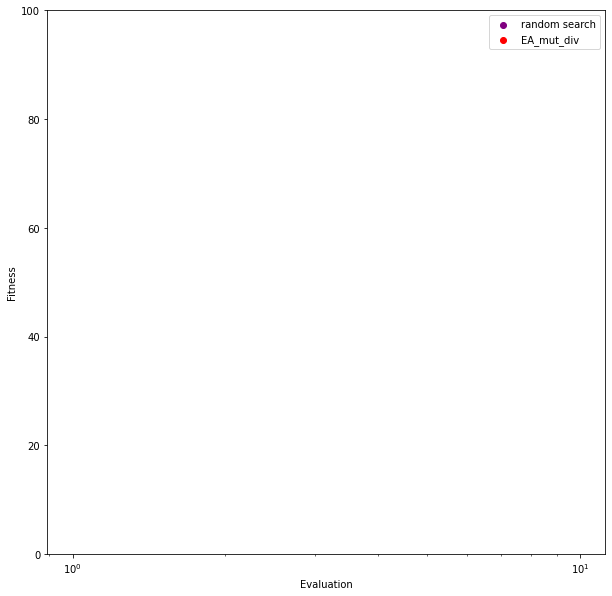

In [52]:
plt.figure(figsize=(10,10))
plt.scatter(res_rs[0], res_rs[1], color='purple', label='random search')
plt.plot(res_rs[0], res_rs[1], color='purple')

# plt.scatter(res_rmhc[0], res_rmhc[1], color='orange', label='random mutation hill climber')
# plt.plot(res_rmhc[0], res_rmhc[1], color='orange')

# plt.scatter(res_rrhc[0], res_rrhc[1], color='blue', label='random restart hill climber')
# plt.plot(res_rrhc[0], res_rrhc[1], color='blue')

# plt.scatter(res_ea[0], res_ea[1], color='green', label='EA')
# plt.plot(res_ea[0], res_ea[1], color='green')

plt.scatter(res_ea_div_mut[0], res_ea_div_mut[1], color='red', label='EA_mut_div')
plt.plot(res_ea_div_mut[0], res_ea_div_mut[1], color='red')

plt.legend()

plt.ylim(0, 100)
plt.xscale('log')
plt.ylabel("Fitness")
plt.xlabel("Evaluation");

In [ ]:
res_rrhc[2]

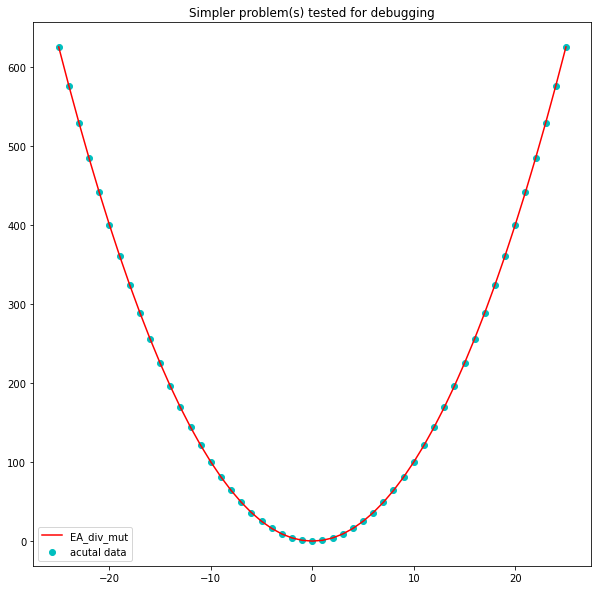

In [70]:
plt.figure(figsize=(10,10))
plt.scatter(x_s, y_s, label="acutal data",c='c');
# plt.plot(x_s, res_rs[3], label="random search");
# plt.plot(x_s, res_rrhc[3], label="random restart HC");
# plt.plot(x_s, res_rmhc[3], label="random mutation HC");
# plt.plot(x_s, res_ea[3], label="EA_div");
plt.plot(x_s, res_ea_div_mut[3], label="EA_div_mut", c='red');
plt.title("Simpler problem(s) tested for debugging")
plt.legend()

In [609]:
def save_data(result, title):
    today = datetime.now()
    d = today.strftime("%Y-%m-%d-%H-%M")
    path = "/Users/dxx0511a/Desktop/Columbia/MECS_4510_EA/hw2/output/" 
    
    df_plot = pd.DataFrame(data={'evaluation': result[0], 'mse': result[1]})
    df_graph = pd.DataFrame(data={"y_cal": result[3]})
    
    with open(f"{path}{d}_{title}_e{num_evaluation}_final_equation.txt",'w') as e:
            for ele in result[2]:
                e.write(str(ele))
                e.write('\n')
                

    df_plot.to_csv(f"{path}{d}_{title}_e{num_evaluation}_plot.csv", index=False)
    df_graph.to_csv(f"{path}{d}_{title}_e{num_evaluation}_graph.csv", index=False)


In [610]:
# save_data(res_rs,title="rs")
# save_data(res_rmhc,title="rmhc")
# save_data(res_rrhc,title="rrhc")
save_data(res_ea,title="ea_div")

In [ ]:
arr = [1,2,3,4]
def dummy(arr):
    for i in range(len(arr)):
        arr.remove(arr[i])
    return arr
dummy(arr)

In [ ]:
a =[1,2,3,4,5,6]
b = ['a','b']
i = 0
while i < len(a):
    for ele in b:
        print (ele)
    i += 1